<h1>Visualizations</h1>

<h2>Import Libraries</h2>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

<h2>Import Data</h2>

In [2]:
df = pd.read_parquet('data/combined_files.parquet')
df.head()

,power,knoxville_temperature_2m,knoxville_relative_humidity_2m,knoxville_precipitation,knoxville_rain,knoxville_snowfall,knoxville_snow_depth,knoxville_apparent_temperature,knoxville_cloud_cover,knoxville_wind_speed_10m,...,month,day_percent,hour,season_Fall,season_Spring,season_Summer,season_Winter,runtime,power_1hr,power_1day
0,13510,44.399300,95.629303,0.0,0.0,0.0,0.0,39.823086,0.0,1.890231,...,1,0.064516,0,False,False,False,True,24.0,13902.0,14421.0
1,13114,45.749298,94.351883,0.0,0.0,0.0,0.0,42.451595,13.0,1.200324,...,1,0.064516,1,False,False,False,True,25.0,13510.0,13940.0
2,12887,45.299301,94.991661,0.0,0.0,0.0,0.0,42.088787,4.0,1.101308,...,1,0.064516,2,False,False,False,True,26.0,13114.0,13621.0
3,12737,44.219299,95.956245,0.0,0.0,0.0,0.0,40.415550,51.0,1.368721,...,1,0.064516,3,False,False,False,True,27.0,12887.0,13406.0
4,12834,47.369301,91.849159,0.0,0.0,0.0,0.0,43.957150,39.0,1.417247,...,1,0.064516,4,False,False,False,True,28.0,12737.0,13258.0


<h2>Create Visualization Dataframe</h2>

In [8]:
# recreate season column - Winter, Spring, Summer, Fall
df['season'] = pd.from_dummies(df[['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']], sep='_')

In [32]:
# recreate date columns
df['day'] = 1
df['first_of_month'] = pd.to_datetime(df[['year', 'month', 'day']])
df['day'] = df['day_percent'] * df['first_of_month'].dt.daysinmonth
df['date_no_hour'] = pd.to_datetime(df[['year', 'month', 'day']])
df['date'] = df['date_no_hour'] + pd.to_timedelta(df['hour'], unit='h')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17490 entries, 0 to 17489
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   power                                       17490 non-null  int64         
 1   knoxville_temperature_2m                    17490 non-null  float32       
 2   knoxville_relative_humidity_2m              17490 non-null  float32       
 3   knoxville_precipitation                     17490 non-null  float32       
 4   knoxville_rain                              17490 non-null  float32       
 5   knoxville_snowfall                          17490 non-null  float32       
 6   knoxville_snow_depth                        17490 non-null  float32       
 7   knoxville_apparent_temperature              17490 non-null  float32       
 8   knoxville_cloud_cover                       17490 non-null  float32       
 9   knoxvi

<h2>Create Orderings for Plots</h2>

In [21]:
df['season'] = pd.Categorical(df['season'], categories=['Winter', 'Spring', 'Summer', 'Fall'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17490 entries, 0 to 17489
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   power                                       17490 non-null  int64         
 1   knoxville_temperature_2m                    17490 non-null  float32       
 2   knoxville_relative_humidity_2m              17490 non-null  float32       
 3   knoxville_precipitation                     17490 non-null  float32       
 4   knoxville_rain                              17490 non-null  float32       
 5   knoxville_snowfall                          17490 non-null  float32       
 6   knoxville_snow_depth                        17490 non-null  float32       
 7   knoxville_apparent_temperature              17490 non-null  float32       
 8   knoxville_cloud_cover                       17490 non-null  float32       
 9   knoxvi

In [28]:
season_palette = {'Winter': 'steelblue',
                  'Spring': 'springgreen',
                  'Summer': 'deeppink',
                  'Fall': 'orange'}

<h2>Create Visualizations</h2>

Text(0.5, 0, 'Hour')

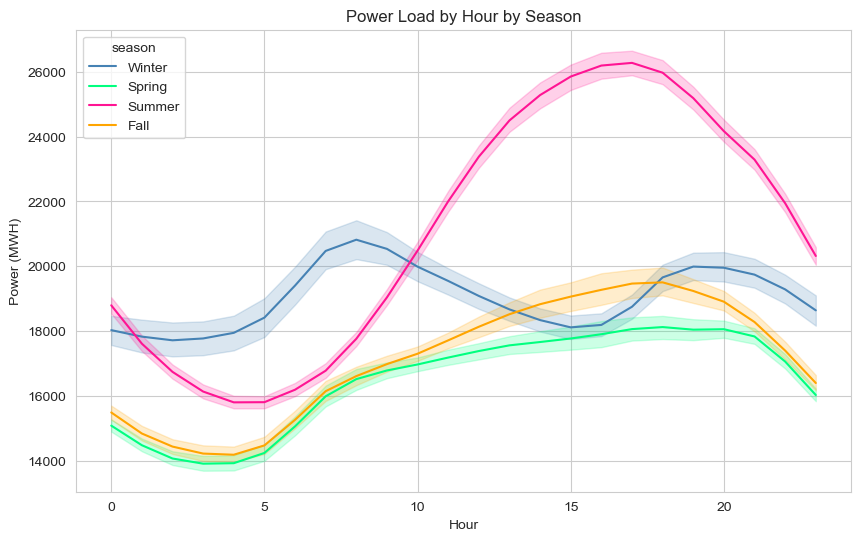

In [30]:
# power by hour by season
fig = plt.figure(figsize=(10,6))
sns.lineplot(df, x='hour', y='power', hue='season', palette=season_palette)
plt.title('Power Load by Hour by Season')
plt.ylabel('Power (MWH)')
plt.xlabel('Hour')

Text(0.5, 0, 'Date')

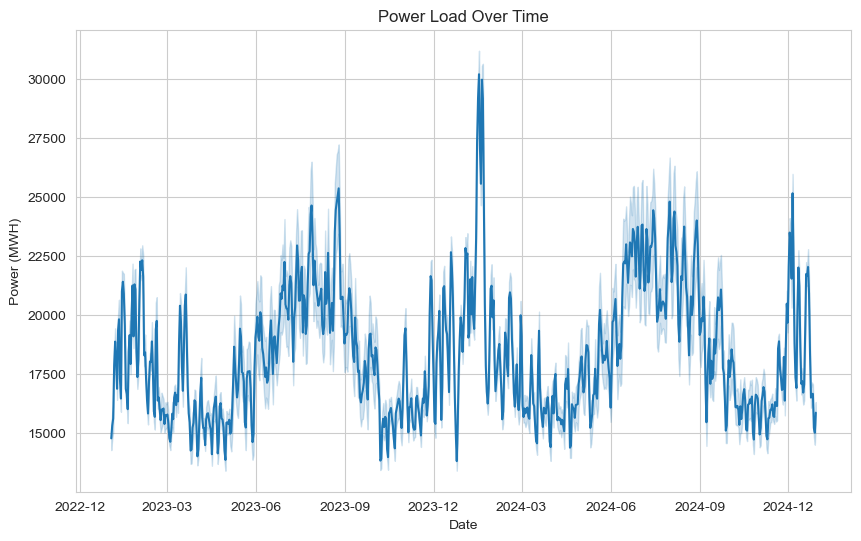

In [36]:
# power over time
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(df, x='date_no_hour', y='power')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.title('Power Load Over Time')
plt.ylabel('Power (MWH)')
plt.xlabel('Date')

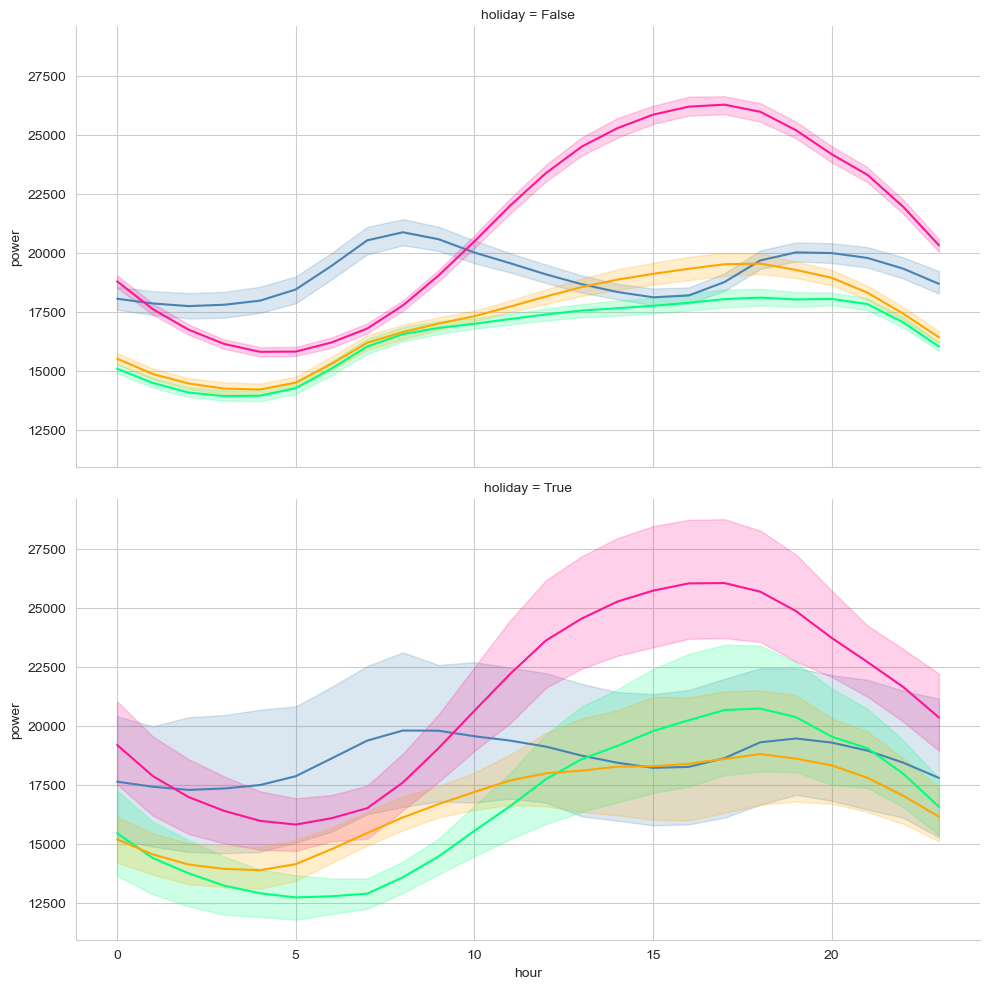

In [43]:
# power by hour by season by holiday
g = sns.FacetGrid(df, row='holiday', height=5, aspect=2)
g.map_dataframe(sns.lineplot, x='hour', y='power', hue='season', palette=season_palette)
# sns.lineplot(df, x='hour', y='power', hue='season', palette=season_palette)
# plt.title('Power Load by Hour by Season')
# plt.ylabel('Power (MWH)')
# plt.xlabel('Hour')

Text(0, 0.5, 'Power (MWH)')

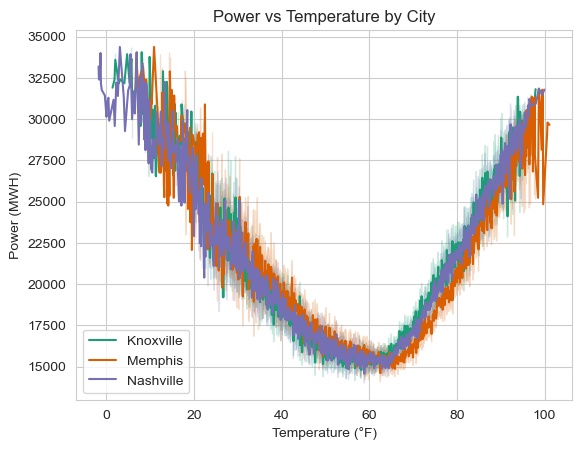

In [50]:
# plots by city
sns.set_palette('Dark2')
weather_columns = [col for col in df.columns if col.endswith('_temperature_2m')]
for weather_col in weather_columns:
    city_name = weather_col.split('_', 1)[0]
    city_name = city_name.title()
    sns.lineplot(df, x=weather_col, y='power', label=city_name)

plt.legend()
plt.title('Power vs Temperature by City')
plt.xlabel('Temperature (°F)')
plt.ylabel('Power (MWH)')